Welcome to this IPython notebook! Here we will create a computer vision model that can classify various parts of plants using the KewMNIST dataset

Install and load the necessary packages

In [2]:
pip install tensorflow


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/390.3 MB 6.7 MB/s eta 0:00:58
   ---------------------------------------- 2.6/390.3 MB 6.6 MB/s eta 0:00:59
   ---------------------------------------- 4.7/390.3 MB 7.7 MB/s eta 0:00:51
    --------------------------------------- 6.8/390.3 MB 8.2 MB/s eta 0:00:47
    --------------------------------------- 8.4/390.3 MB 8.3 MB/s eta 0:00:47
   - -------------------------------------- 10.5/390.3 MB 8.5 MB/s eta 0:00:45
   - -------------------------------------- 12.3/390.3 MB 8.7 MB/s eta 0:00:44
   - -------------------------------------- 14.2/390.3 MB 8.7 MB/s eta 0:00:44
   - -------------------------------------- 16.3/390.3 MB 8.7 MB/s eta 0:00:43
   - -------------------------------------- 18.4/390.3 MB 8.9 MB/s eta 0:00:42
   -- ------------------------------------- 20.2/390.3 MB 8.9 MB/s eta 0:00:42
   -- ------------------------------------- 22.3/390.3 MB 8.9 MB/

In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
import os
# get the current working directory
current_working_directory = os.getcwd()
# print output to the console
print(current_working_directory)
import subprocess
import sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "rdata"])
import rdata


2.18.0
c:\Users\asoku\Downloads


Load in the data KewMNIST dataset (this can take a little while)

In [3]:
kew_mnist = rdata.read_rda('/Users/asoku/Downloads/Kew-MNIST-full-dataset.Rdata')
#""C:\Users\asoku\Downloads\Kew-MNIST-full-dataset.Rdata""
# please specify your own path

In [14]:
kew_mnist

{'kew_train_images': array([[[0.69019608, 0.90980392, 0.74901961, ..., 0.10196078,
          0.        , 0.01568627],
         [0.74901961, 0.76862745, 0.69019608, ..., 0.        ,
          0.01176471, 0.00392157],
         [0.84705882, 0.85490196, 0.70980392, ..., 0.01176471,
          0.00784314, 0.01176471],
         ...,
         [0.01960784, 0.01568627, 0.02352941, ..., 0.25882353,
          0.49019608, 0.36862745],
         [0.00784314, 0.00392157, 0.01960784, ..., 0.45098039,
          0.41960784, 0.34901961],
         [0.01176471, 0.00392157, 0.00784314, ..., 0.25882353,
          0.40784314, 0.30588235]],
 
        [[0.56862745, 0.74509804, 0.55686275, ..., 0.96470588,
          0.76078431, 0.54509804],
         [0.78039216, 0.69803922, 0.40784314, ..., 0.9254902 ,
          0.8627451 , 0.74901961],
         [0.4745098 , 0.18039216, 0.32941176, ..., 0.72941176,
          0.81960784, 0.75686275],
         ...,
         [0.76470588, 0.65098039, 0.69803922, ..., 0.38431373,
    

Pull out the objects stored in the .Rdata file and make them their own separate objects to work with

In [4]:
kew_train_images = kew_mnist['kew_train_images']
kew_train_labels = kew_mnist['kew_train_labels']
kew_test_images = kew_mnist['kew_test_images']
kew_test_labels = kew_mnist['kew_test_labels']

In [23]:
kew_train_labels

array([2, 5, 5, ..., 3, 2, 3])

Create a list of the class names for the dataset

In [5]:
class_names = ['Flower', 'Fruit', 'Leaf', 'Plant-Tag', 'Stem', 'Whole-Plant']

Look at what objects exist in the workspace

In [17]:
dir()

['In',
 'Out',
 '_',
 '_12',
 '_14',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'class_names',
 'current_working_directory',
 'exit',
 'get_ipython',
 'kew_mnist',
 'kew_test_images',
 'kew_test_labels',
 'kew_train_images',
 'kew_train_labels',
 'np',
 'open',
 'os',
 'plt',
 'quit',
 'rdata',
 'subprocess',
 'sys',
 'tf']

Take a look at the structure of the data

In [8]:
class_names
# Each image is mapped to a single label


['Flower', 'Fruit', 'Leaf', 'Plant-Tag', 'Stem', 'Whole-Plant']

In [9]:
kew_train_images.shape
# dimension of the dataset

(1529, 500, 500)

In [10]:
len(kew_train_labels)

1529

In [11]:
kew_train_labels
# Each label is an integer between 0 and 5

array([2, 5, 5, ..., 3, 2, 3])

In [12]:
kew_test_images.shape

(513, 500, 500)

Plot the first image in the dataset (you can also try changing the 0 to a different number)

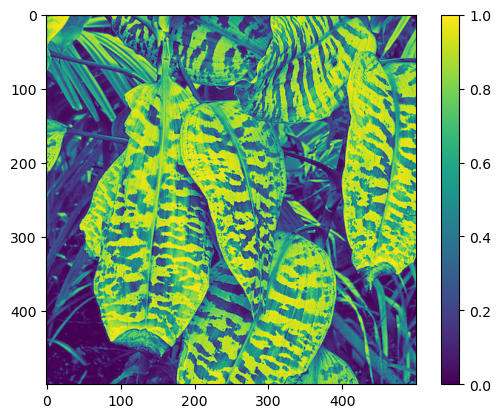

In [23]:
plt.figure()
plt.imshow(kew_train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Plot a grid of the first 25 images

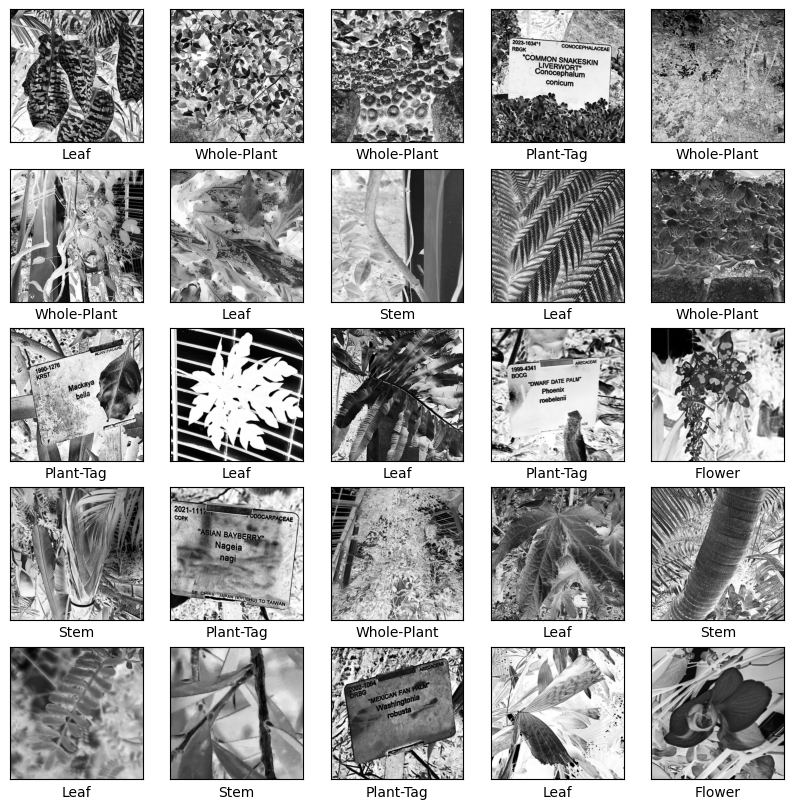

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(kew_train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[kew_train_labels[i]])
plt.show()
#subplot figures

Now let's build the the model!

What does the flatten layer do?

What is the difference between the 'relu' and 'softmax' dense layers?

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(500, 500)), #flattening into 1 dimension
    tf.keras.layers.Dense(200, activation='relu'), #features layer, learns the features
    tf.keras.layers.Dense(6, activation='softmax') #learns probabilities , 6 = 6 classes
])

c:\Users\asoku\Anaconda24\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Now let's compile the model



Where in the code are we specifying the loss function?

Where in the code are we specifying the accuracy?

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #minimise the loss function
              metrics=['accuracy'])


Allright we're ready to train the model!

How many times will we show the neural network the data?

In [23]:
model.fit(kew_train_images, kew_train_labels, epochs=10, verbose=2)

Epoch 1/10


c:\Users\asoku\Anaconda24\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


48/48 - 19s - 390ms/step - accuracy: 0.3368 - loss: 59.8416
Epoch 2/10
48/48 - 18s - 365ms/step - accuracy: 0.4428 - loss: 11.1006
Epoch 3/10
48/48 - 16s - 340ms/step - accuracy: 0.4781 - loss: 10.1046
Epoch 4/10
48/48 - 17s - 349ms/step - accuracy: 0.5592 - loss: 6.1561
Epoch 5/10
48/48 - 17s - 346ms/step - accuracy: 0.5304 - loss: 8.6659
Epoch 6/10
48/48 - 15s - 317ms/step - accuracy: 0.6442 - loss: 3.9869
Epoch 7/10
48/48 - 16s - 329ms/step - accuracy: 0.6279 - loss: 4.5323
Epoch 8/10
48/48 - 15s - 310ms/step - accuracy: 0.6815 - loss: 3.6170
Epoch 9/10
48/48 - 15s - 302ms/step - accuracy: 0.8005 - loss: 1.5103
Epoch 10/10
48/48 - 14s - 297ms/step - accuracy: 0.8698 - loss: 0.7688


Let's take a look at the overall accuracy of the training run

So how did we do? Keep in mind about 85% accuracy is a good starting point, 95% and above is possible

In [24]:
test_loss, test_acc = model.evaluate(kew_test_images,  kew_test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

17/17 - 1s - 56ms/step - accuracy: 0.3645 - loss: 6.5423

Test accuracy: 0.36452242732048035


Now let's use the model to predict what some images are

Here we're getting set up to make plots of these predictions

In [25]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(kew_test_images)
predictions[0]
np.argmax(predictions[0])
kew_test_labels[0]
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


Now let's make a plot showing two images and the predictions for those images

Now try changing the i = 0 or 9 to a different number and rerunning the code 

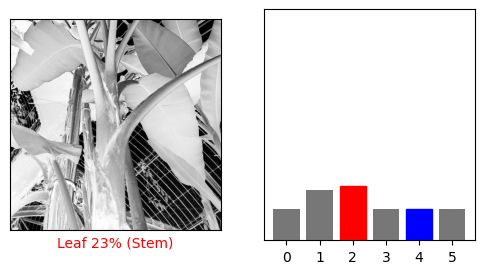

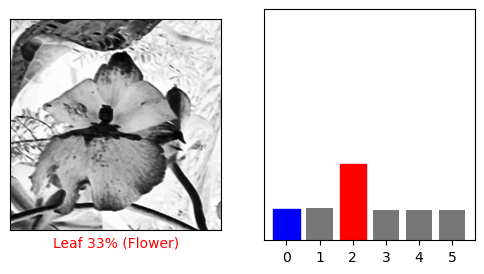

['Flower', 'Fruit', 'Leaf', 'Plant-Tag', 'Stem', 'Whole-Plant']

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], kew_test_labels, kew_test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  kew_test_labels)
plt.show()

i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], kew_test_labels, kew_test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  kew_test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.


class_names


Can plot lots of these predictions at once, here 15

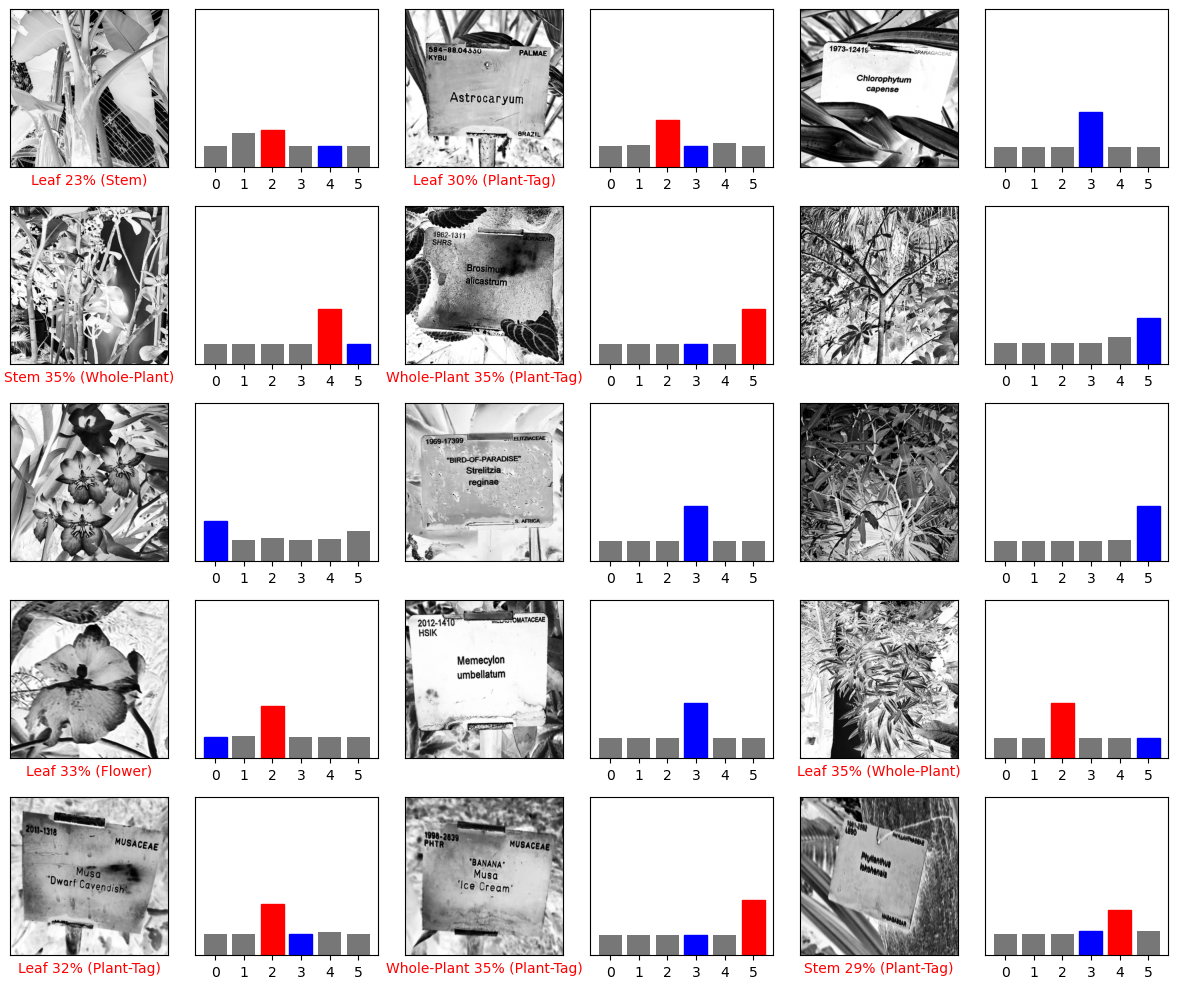

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], kew_test_labels, kew_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], kew_test_labels)
plt.tight_layout()
plt.show()

Here now we're making a prediction for a single image

(500, 500)
(1, 500, 500)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[0.12956251 0.12956251 0.12956251 0.3521874  0.12956251 0.12956251]]


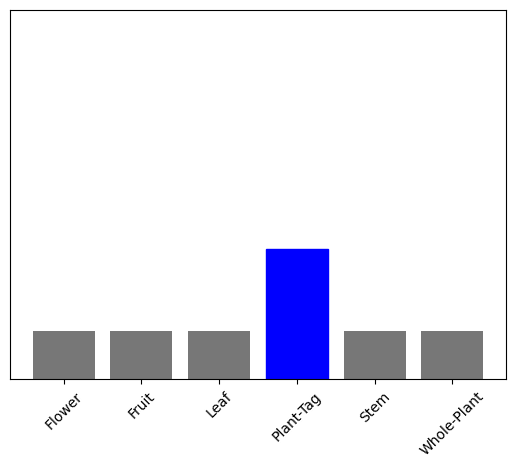

In [30]:
# Grab an image from the test dataset.
img = kew_test_images[2]

print(img.shape)
# Add the image to a batch where it's the only member.

img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], kew_test_labels)
_ = plt.xticks(range(6), class_names, rotation=45)
plt.show()

Ok that's it- well done everyone!

As a reminder, the model accuracy we got was using the datset from last year only. 

What are some ways that we might be able to improve the model accuracy?

When there are two bars, it's inaccurately classified

In [ ]:
kew_train_images = kew_mnist['kew_train_images']
kew_train_labels = kew_mnist['kew_train_labels']
kew_test_images = kew_mnist['kew_test_images']
kew_test_labels = kew_mnist['kew_test_labels']

In [ ]:
#your code starts here
#try to pre-train model with a general purpose image dataset

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
model2 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # Adjust the number of classes as needed
])

In [29]:

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)



In [30]:
# Reshape your data to add the channel dimension
kew_train_images = kew_train_images.reshape((kew_train_images.shape[0], 500, 500, 1))
kew_test_images = kew_test_images.reshape((kew_test_images.shape[0], 500, 500, 1))

# Verify the new shape
print(f"Training images shape: {kew_train_images.shape}")
print(f"Test images shape: {kew_test_images.shape}")


Training images shape: (1529, 500, 500, 1)
Test images shape: (513, 500, 500, 1)


In [34]:

# Clear any existing sessions
tf.keras.backend.clear_session()

# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
model2 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # Adjust the number of classes as needed
])

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape and resize your data to match VGG16 input dimensions (224, 224, 3)
def preprocess_images(images):
    # Resize images to 224x224
    images_resized = tf.image.resize(images, (224, 224))
    # Convert grayscale images to RGB (3 channels)
    images_rgb = tf.image.grayscale_to_rgb(images_resized)
    return images_rgb

kew_train_images_resized = preprocess_images(kew_train_images)
kew_test_images_resized = preprocess_images(kew_test_images)

# Verify the new shape
print(f"Training images shape: {kew_train_images_resized.shape}")
print(f"Test images shape: {kew_test_images_resized.shape}")

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)





Training images shape: (1529, 224, 224, 3)
Test images shape: (513, 224, 224, 3)


In [35]:
# Train the model on the new dataset
model2.fit(datagen.flow(kew_train_images_resized, kew_train_labels, batch_size=32), epochs=5)

Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 309s 6s/step - accuracy: 0.4518 - loss: 3.8548
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 323s 7s/step - accuracy: 0.7232 - loss: 0.7397
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 358s 7s/step - accuracy: 0.7886 - loss: 0.5647
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 396s 8s/step - accuracy: 0.8151 - loss: 0.5113
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 379s 8s/step - accuracy: 0.7916 - loss: 0.5274


In [ ]:
# Evaluate the model on the new test dataset
test_loss, test_accuracy = model2.evaluate(kew_test_images_resized, kew_test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
#loss function is way to high

17/17 ━━━━━━━━━━━━━━━━━━━━ 163s 10s/step - accuracy: 0.7216 - loss: 0.9301
Test accuracy: 72.90%


In [6]:
#active learning approach
kew_train_images = kew_mnist['kew_train_images']
kew_train_labels = kew_mnist['kew_train_labels']
kew_test_images = kew_mnist['kew_test_images']
kew_test_labels = kew_mnist['kew_test_labels']

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:


# Step 1: Preprocess the Data
# Convert images to the correct shape and normalize the pixel values (0 to 1).
# Assuming images are grayscale with shape (height, width)
def preprocess_images(images):
    # Add a channel dimension (e.g., (height, width) -> (height, width, 1))
    images = images[..., np.newaxis]
    # Normalize pixel values to be between 0 and 1
    return images / 255.0



In [8]:
kew_train_images = preprocess_images(kew_train_images)
kew_test_images = preprocess_images(kew_test_images)
#maybe tweak the processing of the images if the accuracy is too low?, consider making a function that flips the images, or including a database that has generated images

In [ ]:

# Step 2: Create a Base Convolutional Neural Network (CNN) Model
def create_model():
    model = Sequential([
        # Convolutional layer to extract features
        Conv2D(32, (3, 3), activation='relu', input_shape=(kew_train_images.shape[1], 
                                                           kew_train_images.shape[2], 1)),
        MaxPooling2D((2, 2)),  # Down-sampling layer
        Conv2D(64, (3, 3), activation='relu'),  # Deeper convolutional layer
        MaxPooling2D((2, 2)),  # Another down-sampling layer
        Flatten(),  # Flatten to feed into Dense layers
        Dense(128, activation='relu'),  # Fully connected layer
        Dense(6, activation='softmax')  # Output layer for classification (6 classes)
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model




In [ ]:
# Initialise the model
model = create_model()


c:\Users\asoku\Anaconda24\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# Step 3: Train the Model on a Small Initial Dataset
# Select a small subset of the training data for initial training
initial_samples = 500  # Number of initial labeled samples
x_initial = kew_train_images[:initial_samples]
y_initial = kew_train_labels[:initial_samples]



In [60]:
print(x_initial.shape, x_query.shape)


NameError: name 'x_query' is not defined

In [14]:
# Train the model
print("Training the model on the initial dataset...")
model.fit(x_initial, y_initial, epochs=10, batch_size=32)

Training the model on the initial dataset...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 123s 7s/step - accuracy: 0.2400 - loss: 1.6927
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.3205 - loss: 1.5812
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.2538 - loss: 1.6244
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.3133 - loss: 1.5989
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.2912 - loss: 1.6165
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.2893 - loss: 1.6118
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 286s 19s/step - accuracy: 0.3342 - loss: 1.5830
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.3257 - loss: 1.5815
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.3206 - loss: 1.6014
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.3083 - loss: 1.5950


In [15]:
print("\nEvaluating the model on the inital dataset...")
test_loss, test_accuracy = model.evaluate(x_initial, y_initial)
print(f"Initial Train Accuracy: {test_accuracy * 100:.2f}%")


Evaluating the model on the inital dataset...
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 970ms/step - accuracy: 0.3028 - loss: 1.5792
Initial Train Accuracy: 31.40%


In [61]:
# Step 4: Implement Active Learning Loop
# The pool of unlabeled data (rest of the training data)
x_pool = kew_train_images[initial_samples:]
y_pool = kew_train_labels[initial_samples:]



In [71]:
print(x_initial.shape, x_query.shape)


NameError: name 'x_query' is not defined

In [73]:
def active_learning(model, x_pool, y_pool, n_iterations=10, query_size=50):
    """
    Active Learning Loop:
    - At each iteration, select the most uncertain samples from the unlabeled pool.
    - Add those samples to the training set and retrain the model.
    """
    for i in range(n_iterations):
        print(f"\nActive Learning Iteration {i + 1}/{n_iterations}...")

        # Step 4.1: Use the model to predict probabilities on the unlabeled pool
        predictions = model.predict(x_pool)
        
        # Step 4.2: Calculate uncertainty using least confidence
        uncertainty = 1 - np.max(predictions, axis=1)
        
        # Step 4.3: Select the most uncertain samples (least confidence)
        query_indices = np.argsort(uncertainty)[-query_size:]
        x_query = x_pool[query_indices]
        y_query = y_pool[query_indices]

        # Step 4.4: Remove the queried samples from the pool
        x_pool = np.delete(x_pool, query_indices, axis=0)
        y_pool = np.delete(y_pool, query_indices, axis=0)

        # Step 4.5: Add the queried samples to the training set
        x_train = np.concatenate((x_initial, x_query), axis=0)
        y_train = np.concatenate((y_initial, y_query), axis=0)

        # Step 4.6: Retrain the model on the updated training set
        model.fit(x_train, y_train, epochs=5, batch_size=32)

    return model



In [18]:
# Run the active learning loop
model = active_learning(model, x_pool, y_pool)





Active Learning Iteration 1/10...
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 934ms/step
Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 155s 6s/step - accuracy: 0.3147 - loss: 1.6196
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.2876 - loss: 1.6324
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.2826 - loss: 1.6116
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.2795 - loss: 1.6281
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.2574 - loss: 1.6118

Active Learning Iteration 2/10...
31/31 ━━━━━━━━━━━━━━━━━━━━ 26s 819ms/step
Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step - accuracy: 0.2941 - loss: 1.5938
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.2815 - loss: 1.6376
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.2882 - loss: 1.6575
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.2633 - loss: 1.6489
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.3196 - loss: 1.6033

Active Learni

In [ ]:
# Step 5: Evaluate the Model on the Test Data
print("\nEvaluating the model on the test dataset...") 
test_loss, test_accuracy = model.evaluate(kew_test_images, kew_test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
#accuracy went up from 36%, to 41.7% with active learning lets try change the parameters of the active learning loop to improve the accuracy


Evaluating the model on the test dataset...
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 982ms/step - accuracy: 0.3905 - loss: 1.7684
Test Accuracy: 41.72%


New approach to active learning

In [ ]:
 def create_optimized_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(kew_train_images.shape[1], 
                                                           kew_train_images.shape[2], 1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),  # Reduced dense layer size
        Dense(6, activation='softmax')  # Output layer for 10 classes
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
# why is it here?

In [40]:
initial_samples = 1000  # Start with more labeled samples
x_initial = kew_train_images[:initial_samples]
y_initial = kew_train_labels[:initial_samples]


In [41]:
query_size = 30  # Reduce the query size


In [42]:
#simple uncertainity rather than entropy 
# Step 4.2: Calculate uncertainty using Least Confidence
uncertainty = 1 - np.max(predictions, axis=1)


In [ ]:
#from here 


In [7]:
# Step 1: Preprocess Data
def preprocess_images(images):
    """Normalize and add the channel dimension to grayscale images."""
    images = images[..., np.newaxis]  # Add channel dimension
    return images / 255.0  # Normalize pixel values to [0, 1]

# Preprocess training and testing data
kew_train_images = preprocess_images(kew_train_images)
kew_test_images = preprocess_images(kew_test_images)



In [8]:
# Step 2: Create CNN Model
def create_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(kew_train_images.shape[1],
                                                           kew_train_images.shape[2], 1)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(6, activation='softmax')  # 6 categories
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



In [9]:
# Initialize model
model = create_model()

# Step 3: Train on Initial Dataset
initial_samples = 1000  # Start with more labeled data
x_initial = kew_train_images[:initial_samples]
y_initial = kew_train_labels[:initial_samples]



c:\Users\asoku\Anaconda24\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#early stopping, so the model halts when the validation stops performing
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
print("Training on initial dataset...")
model.fit(x_initial, y_initial, epochs=5, batch_size=32)

#took too long

Training on initial dataset...
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1135s 34s/step - accuracy: 0.2309 - loss: 1.7292
Epoch 2/5
22/32 ━━━━━━━━━━━━━━━━━━━━ 14:15 86s/step - accuracy: 0.2937 - loss: 1.5878

KeyboardInterrupt: 

In [ ]:
# Step 4: Active Learning Setup
x_pool = kew_train_images[initial_samples:]  # Unlabeled pool
y_pool = kew_train_labels[initial_samples:]  # Corresponding labels in the pool



In [ ]:
# Active Learning Function
def active_learning(model, x_pool, y_pool, x_initial, y_initial, n_iterations=5, query_size=30):
    """
    Active learning loop to iteratively improve the model with uncertain samples.
    """
    for iteration in range(n_iterations):
        print(f"\nActive Learning Iteration {iteration + 1}/{n_iterations}...")

        # Step 4.1: Predict probabilities on the unlabeled pool
        predictions = model.predict(x_pool)

        # Step 4.2: Calculate Least Confidence (Uncertainty = 1 - max probability)
        uncertainty = 1 - np.max(predictions, axis=1)

        # Step 4.3: Select the most uncertain samples (top `query_size` indices)
        query_indices = np.argsort(uncertainty)[-query_size:]
        x_query = x_pool[query_indices]
        y_query = y_pool[query_indices]

        # Step 4.4: Remove queried samples from the pool
        x_pool = np.delete(x_pool, query_indices, axis=0)
        y_pool = np.delete(y_pool, query_indices, axis=0)

        # Step 4.5: Add queried samples to the training set
        x_initial = np.concatenate((x_initial, x_query), axis=0)
        y_initial = np.concatenate((y_initial, y_query), axis=0)

        # Step 4.6: Retrain the model on the updated training set
        print(f"Training on {x_initial.shape[0]} samples...")
        model.fit(x_initial, y_initial, epochs=5, batch_size=32)

    return model



In [ ]:
# Step 5: Run Active Learning Loop
model = active_learning(model, x_pool, y_pool, x_initial, y_initial, n_iterations=5, query_size=30)




In [ ]:
# Step 6: Evaluate the Model on Test Data
print("\nEvaluating on the test dataset...")
test_loss, test_accuracy = model.evaluate(kew_test_images, kew_test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
#????????????????????????????/
# Active learning
model = active_learning(model, x_pool, y_pool, n_iterations=5, query_size=query_size)

#what has happened



Active Learning Iteration 1/5...
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [ ]:
# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(kew_test_images, kew_test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [13]:
#pre-process the data:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomContrast, Rescaling

data_augmentation = Sequential([
    RandomFlip("horizontal"),         # Horizontal flipping
    RandomRotation(0.2),              # Rotate by ±20%
    RandomContrast(0.2),              # Adjust contrast by ±20%
    Rescaling(1.0/255)                # Normalize pixel values to [0, 1]
])


In [20]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    data_augmentation,  # Apply augmentations
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.Dense(6, activation='softmax')
])




In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #minimise the loss function
              metrics=['accuracy'])

In [18]:
kew_train_images = kew_mnist['kew_train_images']
kew_train_labels = kew_mnist['kew_train_labels']
kew_test_images = kew_mnist['kew_test_images']
kew_test_labels = kew_mnist['kew_test_labels']

In [24]:
import pyreadr
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [ ]:
kew_train_images_norm = kew_train_images.astype('float32') / 255.0
kew_test_images_norm = kew_test_images.astype('float32') / 255.0 #too much memory needed to process images

MemoryError: Unable to allocate 1.42 GiB for an array with shape (1529, 500, 500) and data type float32

In [35]:
#create data generators
from tensorflow.keras.utils import Sequence
# Define a custom data generator
class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size=32):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        # Normalize the batch of images
        return batch_x.astype('float32') / 255.0, batch_y


In [36]:
# Create generators for training and testing data
train_generator = DataGenerator(kew_train_images, kew_train_labels)
test_generator = DataGenerator(kew_test_images, kew_test_labels)

In [ ]:
# Define data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])
#made the model worse

In [38]:

# Define the model
model = models.Sequential([
    layers.Input(shape=(500, 500, 1)),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6) #remove the activation due to from_logits = True
])

In [39]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [41]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored quantity
    verbose=1            # Print a message when early stopping is triggered
)

In [42]:
# Train the model
history = model.fit(
    train_generator,
    batch_size=32,
    epochs=10,
    validation_data=test_generator, 
    callbacks=[early_stopping]
)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 848s 17s/step - accuracy: 0.2811 - loss: 1.6010 - val_accuracy: 0.3041 - val_loss: 1.5972
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 445s 9s/step - accuracy: 0.2941 - loss: 1.5879 - val_accuracy: 0.2417 - val_loss: 1.5982
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2055s 43s/step - accuracy: 0.2852 - loss: 1.6017 - val_accuracy: 0.3041 - val_loss: 1.5875
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 343s 7s/step - accuracy: 0.3066 - loss: 1.5887 - val_accuracy: 0.3041 - val_loss: 1.6029
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 293s 6s/step - accuracy: 0.3130 - loss: 1.5876 - val_accuracy: 0.3041 - val_loss: 1.6201
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 283s 6s/step - accuracy: 0.3038 - loss: 1.5900 - val_accuracy: 0.3041 - val_loss: 1.6116
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


In [44]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/step - accuracy: 0.3063 - loss: 1.6057
Test Loss: 1.5875
Test Accuracy: 0.3041


In [46]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),  # Reduced from 0.1
    layers.RandomZoom(0.05),      # Reduced from 0.1
])


In [78]:

# Define the model
model = models.Sequential([
    layers.Input(shape=(500, 500, 1)),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6) #remove the activation due to from_logits = True
])



In [79]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [49]:
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored quantity
    verbose=1            # Print a message when early stopping is triggered
)

In [50]:
# Train the model
history = model.fit(
    train_generator,
    batch_size=32,
    epochs=10,
    validation_data=test_generator, 
    callbacks=[early_stopping]
)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 525s 11s/step - accuracy: 0.2917 - loss: 1.6583 - val_accuracy: 0.3041 - val_loss: 1.6007
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 510s 10s/step - accuracy: 0.2937 - loss: 1.6111 - val_accuracy: 0.2417 - val_loss: 1.5943
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 410s 8s/step - accuracy: 0.2829 - loss: 1.5844 - val_accuracy: 0.3041 - val_loss: 1.5982
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 338s 7s/step - accuracy: 0.2870 - loss: 1.5941 - val_accuracy: 0.3041 - val_loss: 1.6048
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 324s 6s/step - accuracy: 0.3116 - loss: 1.5772 - val_accuracy: 0.3041 - val_loss: 1.5855
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 331s 7s/step - accuracy: 0.3145 - loss: 1.5821 - val_accuracy: 0.3041 - val_loss: 1.5870
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 332s 7s/step - accuracy: 0.3065 - loss: 1.5916 - val_accuracy: 0.3041 - val_loss: 1.5873
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 394s 8s/step - accuracy: 0.3224 - loss: 1.5753 - val_accuracy: 0.3041 -

In [51]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3063 - loss: 1.6022
Test Loss: 1.5855
Test Accuracy: 0.3041


In [80]:
# Run the active learning loop 2
model = active_learning(model, x_pool, y_pool) #run one more time


Active Learning Iteration 1/10...
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 486ms/step
Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.2599 - loss: 9.3606
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.4248 - loss: 1.4116
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 65s 4s/step - accuracy: 0.4748 - loss: 1.2570
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.5616 - loss: 1.0857
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.6017 - loss: 1.0320

Active Learning Iteration 2/10...
31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 705ms/step
Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 91s 5s/step - accuracy: 0.6111 - loss: 1.0366
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.5933 - loss: 1.0600
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.6569 - loss: 0.9695
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.6365 - loss: 1.0165
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.5897 - loss: 0.9992

Active Learnin

In [ ]:
test_loss, test_acc = model.evaluate(kew_test_images,  kew_test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
#evaluate how well the model has learnt from the active learning process, significant increase in accuracy following the image processing and the active learning process

17/17 - 8s - 499ms/step - accuracy: 0.6160 - loss: 1.6487

Test accuracy: 0.6159843802452087


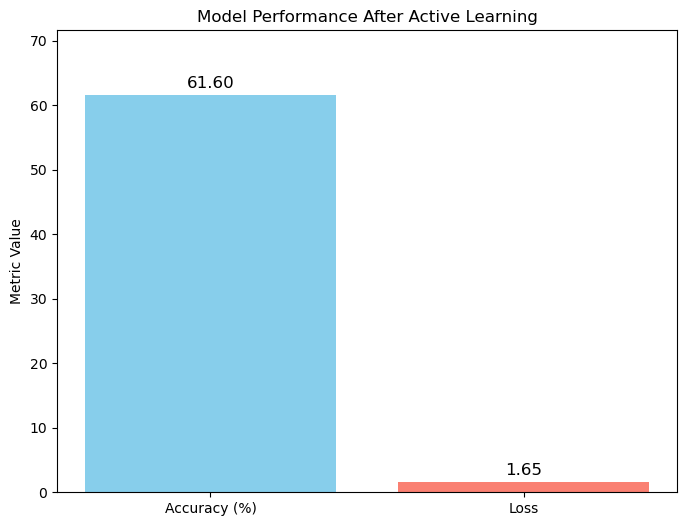

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics from the process
test_accuracy = test_acc * 100  # Convert accuracy to percentage
test_loss = test_loss

# Create a bar chart
metrics = ['Accuracy (%)', 'Loss']
values = [test_accuracy, test_loss]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'salmon'])
plt.ylim(0, max(values) + 10)  # Add buffer to the y-axis

# Annotate the bars with the values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 1, f'{value:.2f}',
             ha='center', fontsize=12)

# Add labels and a title
plt.ylabel('Metric Value')
plt.title('Model Performance After Active Learning and data preprocessing')
plt.show()
#do a multi-figure that shows the model performance initally and after active learning

In [94]:
# Step 1: Generate predictions
predictions = model.predict(kew_test_images)  # Assuming test_generator is preprocessed data

17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 456ms/step


Test Accuracy: 1.95%


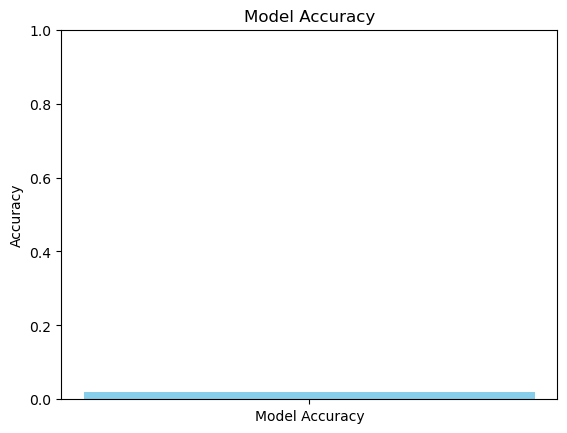

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming predictions are probabilities, convert them to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = kew_test_labels # Ensure these are also class indices

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy as a single bar
plt.bar(["Model Accuracy"], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()


In [ ]:
test_images, test_labels = [], []
for batch_images, batch_labels in test_generator:
    test_images.extend(batch_images)
    test_labels.extend(batch_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
#too long 

KeyboardInterrupt: 

In [89]:
print(kew_test_images.shape)  # Check the shape of the test image batch


(513, 500, 500)


In [90]:
batch_size = 50

num_samples = len(test_generator) * batch_size  # Adjust batch_size
test_images = np.zeros((num_samples, *kew_test_images.shape))  # Use appropriate image shape
test_labels = np.zeros((num_samples, len(class_names)))  # Adjust for your label format

idx = 0
for batch_images, batch_labels in test_generator:
    batch_size = len(batch_images)
    test_images[idx:idx + batch_size] = batch_images
    test_labels[idx:idx + batch_size] = batch_labels
    idx += batch_size


MemoryError: Unable to allocate 812. GiB for an array with shape (850, 513, 500, 500) and data type float64

In [ ]:
# Step 3: Define plotting helper functions
def plot_image(i, prediction, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction)
    color = 'blue' if predicted_label == np.argmax(true_label) else 'red'
    plt.xlabel(f"Predicted: {predicted_label}\n(True: {np.argmax(true_label)})", color=color)

def plot_value_array(i, prediction, true_label):
    true_label = np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks(range(len(prediction)))
    plt.yticks([])
    thisplot = plt.bar(range(len(prediction)), prediction, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



In [ ]:
# Step 4: Plot predictions
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
